
Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>







<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за очень качественную работу - видно, что приложено много усилий,
- Я оставил некоторые советы, надеюсь они будут полезными и интересными
- Есть некоторые недочеты, которые нужно поправить, но у тебя это не должно занять много времени)
- Жду обновленную работу


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек 
- Критические недочеты исправлены - работа  корректна
- Я оставил важный комментарий по поводу времени обучения - посмотри пожалуйста
- Рад был быть полезен. Удачи в дальнейшем обучении!


# Определение стоимости автомобилей

<div class="alert alert-info">
    <b>Комментарий студента:</b>
    Привет! Меня зовут Дмитрий Норкин! Ко мне на ты! 

<div class="alert alert-block alert-success">
<b>Успех:</b> Принял, пойдем смотреть работы

<div style="border:solid gray 2px; padding: 20px">  

В данном проекте искали модели машинного обучения, которые будут предсказывать рыночную стоимость автомобилей!  
Критерии, которые важны заказчику:  

- Качество предсказания (Для оценки качества моделей использовали метрику RMSE.)
- Время обучения модели  
- Время предсказания модели 


## Предобработка данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import phik

from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from category_encoders import TargetEncoder

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNetCV

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

RANDOM = 12345


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>

### Загрузка и изучение данных

In [2]:
pth1 = '/Users/macbookair13i5/Desktop/datasets/Datasets/autos.csv'
pth2 = '/datasets/autos.csv'
pth3 = 'https://code.s3.yandex.net/datasets/autos.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
elif os.path.exists(pth3):
    df = pd.read_csv(pth3)
else:
    display('Something is wrong')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
init_size = df.shape[0]

**Описание данных**

**Признаки**

|Признаки| Описание данных|
|:|:|
|**DateCrawled**| дата скачивания анкеты из базы|
|**VehicleType**| тип автомобильного кузова|
|**RegistrationYear**| год регистрации автомобиля|
|**Gearbox**| тип коробки передач|
|**Power**| мощность (л. с.)|
|**Model**| модель автомобиля|
|**Kilometer**| пробег (км)|
|**RegistrationMonth**| месяц регистрации автомобиля|
|**FuelType**| тип топлива|
|**Brand**| марка автомобиля|
|**NotRepaired**| была машина в ремонте или нет|
|**DateCreated**| дата создания анкеты|
|**NumberOfPictures**| количество фотографий автомобиля|
|**PostalCode**| почтовый индекс владельца анкеты (пользователя)|
|**LastSeen**| дата последней активности пользователя|

---

**Целевой признак**

|Целевой признак|Описание данных|  
|:|:|
|**Price**| цена (евро)|

### Обработка Дубликатов, Пропусков и Выбросов

#### Дубликаты

In [5]:
# Изучим явные дубликаты

df.duplicated().sum()

4

In [6]:
# Удалим дубликаты

df = df.drop_duplicates()

**Удалим ненужные признаки**

In [7]:
# СТолбцы ['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'] не несут в себе нужной информации

df = df.drop(['DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis = 1)

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - верное решение.
</div>

In [8]:
# Изучим пропуски в категориальных признаках

cat_features = []
print()
print('Пропуски в категориальных столбцах:')
print()

for col in df.columns:
    if df[col].dtype == 'object':
        
        # Выделим категориальные принципы:
        cat_features.append(col)
        
        # Пропуски
        print(f'Пропуски в столбце {col}: {df[col].isna().sum()}')
        print(f'Доля пропусков от общей выборки: {round(df[col].isna().sum() / len(df[col]) * 100)} %')
    print()


Пропуски в категориальных столбцах:

Пропуски в столбце DateCrawled: 0
Доля пропусков от общей выборки: 0 %


Пропуски в столбце VehicleType: 37490
Доля пропусков от общей выборки: 11 %


Пропуски в столбце Gearbox: 19833
Доля пропусков от общей выборки: 6 %


Пропуски в столбце Model: 19705
Доля пропусков от общей выборки: 6 %



Пропуски в столбце FuelType: 32895
Доля пропусков от общей выборки: 9 %

Пропуски в столбце Brand: 0
Доля пропусков от общей выборки: 0 %

Пропуски в столбце Repaired: 71154
Доля пропусков от общей выборки: 20 %



#### Пропуски

In [9]:
# Обратботаем пропуски в категориалных признаках

# Отсутствие данных о ремонте заменим на "no"
df['Repaired'] = df['Repaired'].fillna('no')

# Остальные кат. пропуски заменим на "0"
for col in df[cat_features].columns:
    df[col] = df[col].fillna('0')


<div class="alert alert-block alert-success">
<b>Успех:</b> Пропуски обработаны хорошим образом
</div>


<div class="alert alert-block alert-warning">
<b>Совет:</b> У fuel_type есть категории, которые означают одно и тоже - их можно объединить, либо подумать может они действительно означают, что-то разное
</div>

<div class="alert alert-block alert-info">
<b>Изменения V1:</b>  
Объединим значения в 'FuelType',обозначающие одно и то же

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> А может пропуски это вообще дизель?
</div>

In [10]:
df.loc[:,'FuelType'][df.loc[:, 'FuelType'] == 'gasoline'] = 'petrol'
df.loc[:,'FuelType'][df.loc[:, 'FuelType'] == 'cng'] = 'lpg'
df.loc[:,'FuelType'][df.loc[:, 'FuelType'] == '0'] = 'other'

/var/folders/8l/pbs9j79s2x537_ttxmbz8y5r0000gn/T/ipykernel_46624/2782343898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'FuelType'][df.loc[:, 'FuelType'] == 'gasoline'] = 'petrol'
/var/folders/8l/pbs9j79s2x537_ttxmbz8y5r0000gn/T/ipykernel_46624/2782343898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'FuelType'][df.loc[:, 'FuelType'] == 'cng'] = 'lpg'
/var/folders/8l/pbs9j79s2x537_ttxmbz8y5r0000gn/T/ipykernel_46624/2782343898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [11]:
df['FuelType'].value_counts()

petrol      315068
other        33099
lpg           5875
hybrid         233
electric        90
Name: FuelType, dtype: int64

In [12]:
# Изучим пропуски в количественных признаках

numeric = []
print()
print('Пропуски в числовых столбцах:')
print()

for col in df.columns:
    if df[col].dtype == 'int64':
        numeric.append(col)
        print(f'Пропуски в столбце {col}: {df[col].isna().sum()}')
        print(f'Доля пропусков от общей выборки: {round(df[col].isna().sum() / len(df[col]) * 100)} %')
        print()


Пропуски в числовых столбцах:

Пропуски в столбце Price: 0
Доля пропусков от общей выборки: 0 %

Пропуски в столбце RegistrationYear: 0
Доля пропусков от общей выборки: 0 %

Пропуски в столбце Power: 0
Доля пропусков от общей выборки: 0 %

Пропуски в столбце Kilometer: 0
Доля пропусков от общей выборки: 0 %

Пропуски в столбце RegistrationMonth: 0
Доля пропусков от общей выборки: 0 %



Пропуски встречаются только в признаках с категориальными значениями. В числовых признаках пропусков нет

#### Выбросы

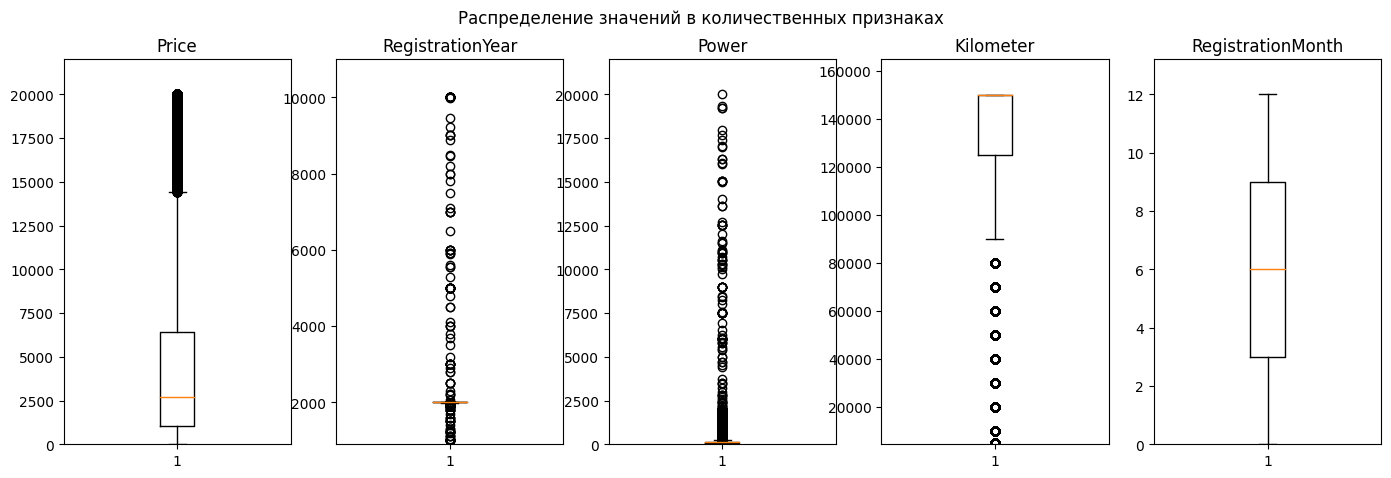

In [13]:
# Границы выбросов:

fig, axs = plt.subplots(1, len(df[numeric].columns), figsize=(17, 5))
fig.suptitle('Распределение значений в количественных признаках')

for n, col in enumerate(df[numeric]):
    axs[n].boxplot(df[numeric][col])
    axs[n].set_title(col)
    axs[n].set_ylim(df[numeric][col].min() - 0.1 * df[numeric][col].min(), df[numeric][col].max() + 0.1 * df[numeric][col].max())
   # = plt.subplots(figsize = (2,4))

plt.show()

Очевидно что некоторые данные в некоторых признаках некорректны: Например год регистрации (более года выгрузки данных), и слишком высокие показатели мощности - неправдоподобны (Эти выбросы нужно почистить)  
  
Остальные данные более менее правдоподобны несмотря на то, что выходят за рамки $±1.5 IQR $

<div class="alert alert-block alert-warning">
<b>Совет: </b> Не всегда выбросы нужно удалять - иногда это могут быть ценные, но редкие наблюдения.
</div>


In [14]:
df[numeric][['RegistrationYear', 'Power']]

,RegistrationYear,Power
0,1993,0
1,2011,190
2,2004,163
3,2001,75
4,2008,69
...,...,...
354364,2005,0
354365,2005,0
354366,2000,101
354367,1996,102


In [15]:
# Почистим выбросы

list_col_size = []
emiss = [
    df[numeric]['RegistrationYear'],
    df[numeric]['Power']
]
for n, col in enumerate(emiss):
    
    high_quantile = col.quantile(0.75)
    low_quantile = col.quantile(0.25)
    iqr = high_quantile - low_quantile
    
    high_treshold = high_quantile + (1.5*iqr)
    low_treshold = low_quantile - (1.5*iqr)
    
    col = col[(col>low_treshold)&(col<high_treshold)]
    list_col_size.append(col)

In [16]:
# Перезапишем признаки без выбросов
df['RegistrationYear'] = list_col_size[0]
df['Power'] = list_col_size[1]

# Удалим образовавшиеся пропуски
df = df.dropna(subset = ['RegistrationYear', 'Power'], axis = 0)



<div class="alert alert-block alert-warning">
<b>Совет:</b> Советую посмотреть на дату выгрузки анкет - там тоже можно увидеть полезную информацию по поводу границ года регистраци.
</div>

<div class="alert alert-block alert-info">
<b>Изменения V1:</b>  
    
Сравним год выгрузки анкет и год регистрации автомобилей.  
Если год регистрации превысит значение года выгрузки анкет - значит данные некорректны

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>

In [17]:
# Исследуем дату выгрузки анкет

df['DateCrawled'] = pd.to_datetime(df['DateCrawled'])

In [18]:
df['DateCrawled'] = df['DateCrawled'].dt.year

In [19]:
# Выяснилось что более 14 тыс. строк несоответствие в дате выгрузки анкеты и в дате регистрации авто

print(f'Несоответсвие даты регистрации авто и выгрузки анкеты в {df[df["RegistrationYear"] > df["DateCrawled"]].shape[0]} строках')

Несоответсвие даты регистрации авто и выгрузки анкеты в 14213 строках


In [20]:
# Удалим строки где год регистрации авто превышает год выгрузки анкеты

df = df[df["RegistrationYear"]< df['DateCrawled'].max()]

In [21]:
# Столбец df['DateCrawled'] больше не понадобится - удалим его

df = df.drop(['DateCrawled'], axis = 1)

#### Распределение значений целевого признака

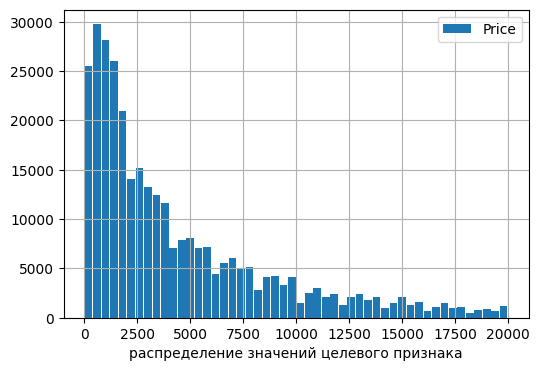

In [22]:
# Изучим распределение значений целевого признака

df['Price'].hist(bins = 50, rwidth=0.9, figsize = (6,4), legend = True)
plt.xlabel('распределение значений целевого признака')
plt.show()

В целевом признаке 10 тыс. строк со значением 0, Эти строки удалим - они создают шум.

In [23]:
# УДалим строки с нулевыми значениями цены

df = df[df['Price'] > 0]


<div class="alert alert-block alert-success">
<b>Успех:</b>  А около-нулевые цены, не кажется подозрительными? Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я  все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div>

#### Количество объектов

In [24]:
final_size = df.shape[0]

In [25]:
print(f'Размер данных после удаления выбросов и пропусков: {final_size}')
print(f'Количество удаленных строк: {init_size - final_size}({round((init_size - final_size) / init_size * 100)}% от размера начальной выборки)')

Размер данных после удаления выбросов и пропусков: 308446
Количество удаленных строк: 45923(13% от размера начальной выборки)


### Корреляция признаков

In [26]:
# Изучим взаимосвязь признаков

df[numeric].corr()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
Price,1.000000,0.672629,0.472747,-0.376350,0.091145
RegistrationYear,0.672629,1.000000,0.211956,-0.400108,0.076904
Power,0.472747,0.211956,1.000000,0.076316,0.110872
Kilometer,-0.376350,-0.400108,0.076316,1.000000,-0.005217
RegistrationMonth,0.091145,0.076904,0.110872,-0.005217,1.000000


На цену больше всего влияет **год регистрации** и **мощность автомобиля**



<div class="alert alert-block alert-warning">
<b>Совет:</b> Советую обратить на инструмент <a href="https://phik.readthedocs.io/en/latest" >phik</a>, который помогает устанавливать связи (не только линейные) между факторами (и не только между количественными)
</div>


<div class="alert alert-block alert-info">
<b>Изменения V1:</b>  
    
Посмотрим корреляцию признаков с помощью phik  
    
(Действительно, phik более эффективный инструмент для изучения взаимосвязей признаков)


In [27]:
# Выведем значения корреляции по мере значимости признаков для целевого

phik_corr = df.phik_matrix()['Price'].sort_values(ascending = False)
phik_corr

interval columns not set, guessing: ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']


Price                1.000000
RegistrationYear     0.725310
Model                0.576109
Power                0.524566
Brand                0.354996
Kilometer            0.328309
Repaired             0.293172
Gearbox              0.279615
VehicleType          0.271729
FuelType             0.183348
RegistrationMonth    0.156361
Name: Price, dtype: float64

Видим что Цена наиболее зависит от **года регистрации** автомобиля, также значительно влияют **Модель** и **Мощность**

### Разделение на обучающую и тестовую выборки

#### Выделение признаков и Целевого признака

In [28]:
# Признаки и Целевой

features = df.drop(['Price'], axis = 1)
target = df['Price']

# Также удалим из списка названий числовых признаков 'Price'
numeric.remove('Price')

<div class="alert alert-block alert-info">
<b>Изменения V1:</b>  
    
Закомментирую кодирование и масштабирование (исправлю ошибки ниже)

In [29]:
## Отдельно сохраним признаки для последующего кодирования категориальных признаков
#
#features_without_cat = features.copy()

#### Кодирование категориальных признаков

In [30]:
## Закодируем категориальные признаки
#
#encoder = OrdinalEncoder()
#features_encode_cat = pd.DataFrame(data = encoder.fit_transform(features_without_cat), columns = features_without_cat.columns, index = features_without_cat.index)

<div class="alert alert-block alert-danger">
    

<b>Ошибка:</b>  OE - хороший выбор для всех моделей, кроме линейных, они не могут корректно обрабатывать номинальные данные обработанные порядковым способом. Для них хорош OHE, но тот же OHE нельзя применять для всех других моделей здесь (потому что не эффективно, с точки зрения времени)
  
Я тебе могу предложить, что можно сделать:
    
- Сделать 1 набор данных: 
    - Закодировать для всех моделей методом TargetEncoder, BinaryEncoder - вполне универсальные варианты
    - Закодировать все признаки методом OHE, а модель машины методом OE
    - Убрать использование линейных моделей (так как их рассмотрение не обязательно) и использовать единственный метод кодировки OE.
- Сделать 2 набора данных
    - Закодировать для линейных моделей методом OHE, для остальных OE (или внутренний метод кодирования данных)
    
P.S. Отмечу, что encoder правильно применять после разбиения данных и обучать только на обучающей выборке, для остальных выборок просто использовать transform. Примеры использования с объяснениями можно найти посмотреь https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 

И не забывай использовать параметр `handle_unknown`
  
</div>


In [31]:
## Поместим признаки в список
#
#features_list = [features[numeric], features_encode_cat]

#### Масштабирование признаков

In [32]:
## Для масштабирования используем  MinMaxScaler
#
#features_scaled = []
#for n, feat in enumerate(features_list):
#    scaler = MinMaxScaler()
#    feat = pd.DataFrame(scaler.fit_transform(feat), columns = feat.columns, index = feat.index)
#    features_scaled.append(feat)

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Упс, и здесь допущена  небольшая ошибка. Хоть это не повлияло на результат, но это важно <br>
 Обучать scaler (fit/fit_transform) нужно только на трейне, инче это может привести к утечке данных (data leak). <br>А для остальных выборок делать просто (transform)
    
Про Data Leaks можно почитать подробнее по следующим ссылкам:

[Ссылка 1](https://towardsdatascience.com/preventing-data-leakage-in-your-machine-learning-model-9ae54b3cd1fb) <br>
[Ссылка 2](https://machinelearningmastery.com/data-preparation-without-data-leakage/)


</div>

In [33]:
## Перезапишем признаки
#
#features[numeric] = features_scaled[0]
#features_encode_cat = features_scaled[1]

#### Train_Test_Split

In [34]:
## Признаки Train и Test для CatboostRegressor
#
#features_cat_train, features_cat_test = train_test_split(features, test_size = 0.25, random_state = RANDOM)

In [35]:
## Признаки Train и Test для простых моделей LGBMRegressor + Общий target
#
#features_encode_cat_train, features_encode_cat_test, target_train, target_test = train_test_split(features_encode_cat, target, test_size = 0.25, random_state = RANDOM)


### Train_Test_Split (Исправление v1)

In [36]:
# Разделим признаки на обучающую и тестовую выборки

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state = RANDOM)

<div class="alert alert-block alert-info">
<b>Изменения V1:</b>  
    Воспользуюсь этой рекомендацией:
    
<div class="alert alert-block alert-danger">
    
Сделать 1 набор данных:  
- Закодировать для всех моделей методом TargetEncoder, BinaryEncoder - вполне универсальные варианты
</div>  
    
Буду применять TargetEncoder, который использует среднее значение целевой метки по данному значению категориального признака.

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Есть контакт
</div>

#### Кодирование категориальных признаков (v.1)

In [37]:
# TargetEncoder

encoder = TargetEncoder()
encoder.fit(features_train, target_train)
features_train_encoded = encoder.transform(features_train)
features_test_encoded = encoder.transform(features_test)

#### Масштабирование признаков (v.1)

In [38]:
# Для масштабирования используем  MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features_train_encoded)

# Масштабирование Train 

features_train_scaled = pd.DataFrame(scaler.transform(features_train_encoded), columns = features_train_encoded.columns)

# Масштабирование Test

features_test_scaled = pd.DataFrame(scaler.transform(features_test_encoded), columns = features_test_encoded.columns)

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>

---

## Подбор Гиперпараметров (RandomizedSearchCV)

###  Простые модели

#### RandomForest

In [39]:
# Гиперпараметры для RandomForest

model_forest = RandomForestRegressor(random_state=RANDOM, n_jobs = -1)
params_forest = {
    'n_estimators': range(100, 1000, 100),
    'max_depth': range(1, 21),
    'max_features': ['log2', 'sqrt', None],
    'min_samples_leaf': range(1, 11),
    'bootstrap': [True, False]
}

In [40]:
# Закоментировано, выполнялось 27min 3s. Лучшие гиперпараметры сохранены ниже
#
#%%time
## Поиск лучших гиперпараметров для RandomForest
#
#rs_forest = RandomizedSearchCV(model_forest, params_forest, cv=3, scoring = 'neg_mean_squared_error', error_score='raise', random_state=12345)
#rs_forest.fit(features_train_scaled, target_train)
#print(f'Лучшие параметры Леса: {rs_forest.best_params_}')

In [41]:
# Лучшие гиперпараметры для RandomForest (scoring = MSE)

rs_forest_best_params = {
    'n_estimators': [900],
    'min_samples_leaf': [5],
    'max_features': ['log2'],
    'max_depth': [16],
    'bootstrap': [True]
}

#### ElasticNetCV

In [42]:
# Закоментировано, выполнялось 27min 3s. Лучшие гиперпараметры сохранены ниже

# Гиперпараметры дляElasticNetCV

elastic_model = ElasticNetCV(random_state = RANDOM)
elastic_params = {
'max_iter': range(2, 20, 1),
'fit_intercept': [True, False]
}

In [43]:
# Закоментировано, выполнялось 28.7 s. Лучшие гиперпараметры сохранены ниже

#%%time
## Поиск лучших гиперпараметров для ElasticNetCV
#
#rs_elastic = RandomizedSearchCV(elastic_model, elastic_params, cv=3, scoring = 'neg_mean_squared_error', error_score='raise', random_state=12345)
#rs_elastic.fit(features_train_scaled, target_train)
#print(f'Лучшие параметры Elastic: {rs_elastic.best_params_}')

In [44]:
# Лучшие гиперпараметры ElasticNetCV (scoring = MSE)

rs_elastic_best_params = {
    'max_iter': [7],
    'fit_intercept': [True]
}

#### LinearRegression

In [45]:
# Гиперпараметры для LinearRegression

linear_model = LinearRegression(n_jobs = -1)
linear_params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

In [46]:
# Закоментировано, выполнялось 2.35 s. Лучшие гиперпараметры сохранены ниже

#%%time
#
## Поиск лучших гиперпараметров для LinearRegression
#rs_linear = RandomizedSearchCV(linear_model, linear_params, cv=3, scoring = 'neg_mean_squared_error', error_score='raise', random_state=12345)
#rs_linear.fit(features_train_scaled, target_train)
#print(f'Лучшие параметры linear: {rs_linear.best_params_}')

In [47]:
linear_best_params = {
    'fit_intercept': [True],
    'copy_X': [True],
    'positive': [False]
}

### Бустинг

#### LGBMRegressor

In [48]:
# Гиперпараметры для LGBMRegressor

lgbm_models = LGBMRegressor()
lgbm_params = {
    'max_depth': range(2, 21),
    'num_leaves': range(2,50),
    'learning_rate': np.arange(0.1,1,0.1)
}

In [49]:
# Закоментировано, выполнялось  22.9 s. Лучшие гиперпараметры сохранены ниже

#%%time
#
## Поиск лучших гиперпараметров для LGBMRegressor
#rs_lgbm = RandomizedSearchCV(lgbm_models, lgbm_params, cv=3, scoring = 'neg_mean_squared_error', error_score='raise', random_state=12345)
#rs_lgbm.fit(features_train_scaled, target_train)
#print(f'Лучшие параметры lgbm: {rs_lgbm.best_params_}')

In [50]:
# Лучшие Гиперпараметры для LGBMRegressor (scoring = MSE)

rs_lgbm_best_params = {
    'num_leaves': [38],
    'max_depth': [17],
    'learning_rate': [0.4]
}

#### CatBoostRegressor

In [51]:
# Гиперпараметры для CatBoostRegressor

cat_models = CatBoostRegressor(loss_function = 'RMSE')
cat_params = {
    'depth': range(2,16),
    'learning_rate': np.arange(.01, 0.1, .01),
    'iterations': range(100, 1000, 100)
}

In [52]:
# Закоментировано, выполнялось  20min 44s, Лучшие гиперпараметры сохранены ниже

#%%time
#
## Закоментировано (Выполнялось 1h 13min 48s. Лучшие гиперпараметры сохранил отдельно - ниже)
#
## Поиск лучших гиперпараметров для CatBoostRegressor
#rs_CatBoost = RandomizedSearchCV(cat_models, cat_params, cv=3, scoring = 'neg_mean_squared_error', error_score='raise',  n_jobs = -1, random_state=12345)
#
#rs_CatBoost.fit(features_train_scaled, target_train, verbose = 500)
#print(f'Лучшие параметры CatBoost: {rs_CatBoost.best_params_}')

In [53]:
# Лучшие Гиперпараметры для CatBoost:

rs_CatBoost_best_params = {
    'learning_rate': [0.09],
    'iterations': [700],
    'depth': [15]
}

In [54]:
# Список с лучшими гиперпараметрами
best_params_list = [
    rs_elastic_best_params,
    linear_best_params, 
    rs_lgbm_best_params,
    
]

# Список моделей
model_list = [elastic_model, linear_model, lgbm_models]

# Список с названиями моделей
name_list = ['ElasticNetCV', 'LinRegression', 'LGBM']

---

## Выбор лучшей модели (GridSearchCV)

<div class="alert alert-info">
    <b>Комментарий студента:</b>
    
У меня вопрос: Правильно ли я поступил:
    Указав в RandomizedSCV и GridSCV параметр scoring = 'neg_mean_squared_error' получаю всегда отрицательное число!  
    Для того чтобы вычислить RMSE (корень из отриц. числа не вычисляется), умножил на -1?

<div class="alert alert-block alert-success">
<b>Успех:</b> Да, все правильно. Данные инструменты всегда пытаются найти улучшить метрику, поэтому и используют отрицательные числа. Домножив на -1 получим  RMSE

In [55]:
# Выберем лучшие модели с помощью CV (Быстрые модели)

grid_best_score_list = []
grid_model_list = []
timing = []
timing_pred = []

for n, model in enumerate(model_list):
    
    grid_model = GridSearchCV(model, best_params_list[n], scoring = 'neg_mean_squared_error')
    start = time.time() # Засекаем время обучения
    grid_model.fit(features_train_scaled, target_train)
    end = time.time() # Стоп
    
    # Время предсказания
    start_pred = time.time()
    grid_model_predictions = grid_model.predict(features_train_scaled)
    end_pred = time.time()
    timing_pred.append(end_pred - start_pred)
    print()
    
    print(f'Время обучения {name_list[n]}: {end - start}')
    print(f'Время предсказания {name_list[n]}: {end_pred - start_pred}')
    
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print(f'RMSE {name_list[n]}: {rmse}')
    grid_best_score_list.append(rmse)
    timing.append(end - start)
    grid_model_list.append(grid_model)


Время обучения ElasticNetCV: 7.9306418895721436
Время предсказания ElasticNetCV: 0.0060389041900634766
RMSE ElasticNetCV: 4048.0335137793018

Время обучения LinRegression: 0.9370758533477783
Время предсказания LinRegression: 0.0051310062408447266
RMSE LinRegression: 2485.408140705538

Время обучения LGBM: 6.08538293838501
Время предсказания LGBM: 0.47639894485473633
RMSE LGBM: 1500.1767359524445



<div class="alert alert-block alert-danger">
    
<b>Ошибка:</b> время обучения это  чистый `.fit()` модели - без подбора гиперпараметров и без предсказаний, 
    
P.S. можно вытаскивать  все  метрики  интересующие заказчика лаконично из GridSearchCV/RandomizedSearchCV, все они лежат в `.cv_results_`
</div>


<div class="alert alert-info">
    <b> Исправил!
Запустил команду начала отсчета вермени чуть позже:</b>  

<div class="alert alert-block alert-warning">
    
<b>Совет[2]:</b> Уже лучше, но не совсем. Fit гридсерча - это не обучение модели -  это и обучение и предсказания на разных фолдах. По хорошему нужно было использовать именной чистый fit модели.
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b>  
    
Kод для моделей, которые обучаются долго будет в отдельных ячейках и закоментирован после выполнения, результаты сохраню в отдельные переменные
    
**RandomForest** обучался 11.618 min.
    
**CatBoost** обучался очень долго (62.180 min.) 

In [56]:
# RandomForest (Закоментировано, т.к долго обучается)
#
#best_model_forest = None
#
#grid_forest = GridSearchCV(model_forest, rs_forest_best_params, scoring = 'neg_mean_squared_error')
#start = time.time() # Засекаем время обучения
#grid_forest.fit(features_train_scaled, target_train)
#end = time.time() # Стоп
#print(f'Время обучения:{end - start}')
#
## Время предсказания
#start_pred = time.time()
#grid_forest_pred = grid_forest.predict(features_train_scaled)
#end_pred = time.time()
#print(f'Время предсказания: {end_pred - start_pred}')
#
#rmse_forest = np.sqrt(-1 * grid_forest.best_score_)
#if grid_forest.score == grid_forest.best_score_:
#    best_model_forest = grid_forest
##grid_model_list.append(best_model_forest)
#
#print(f'RMSE Forest: {rmse_forest}')

In [57]:
# Пропишем отдельно получившиеся результаты RandomForest

time_fit_forest = 697.1235492229462
time_predict_forest = 16.25757908821106
rmse_forest = 1596.5052301048502


grid_best_score_list.append(rmse_forest)
timing_pred.append(time_predict_forest)
timing.append(time_fit_forest)

In [58]:
## Отдельно обучим на других признаках catboost (Закоментировано, т.к долго обучается)
#best_model_cat = None
#
#grid_cat = GridSearchCV(cat_models, rs_CatBoost_best_params, scoring = 'neg_mean_squared_error')
#start = time.time() # Засекаем время обучения
#grid_cat.fit(features_train_scaled, target_train, verbose = False)
#end = time.time() # Стоп
#print(f'Время обучения CatBoost: {end - start}')
#
#start_pred = time.time()
#grid_cat_predictions = grid_cat.predict(features_train_scaled)
#end_pred = time.time()
#print(f'Время предсказания CatBoost: {end_pred - start_pred}')
#
#rmse_cat = np.sqrt(-1 * grid_cat.best_score_)
#print(f'RMSE catboost: {rmse_cat}')
#if grid_cat.score == grid_cat.best_score_:
#    best_model_cat = grid_cat
##grid_model_list.append(best_model_cat)
##grid_best_score_list.append(rmse_cat)
##timing.append(end - start)

In [59]:
# Пропишем отдельно получившиеся результаты CatBoost 

time_fit_cat = 1325.9559531211853
time_predict_cat = 0.7315869331359863
rmse_cat = 1437.124591393891

grid_best_score_list.append(rmse_cat)
timing_pred.append(time_predict_cat)
timing.append(time_fit_cat)

time_models = np.array(timing)
time_pred = np.array(timing_pred)

In [60]:
# Выведем показатели RMSE и время обучения для разнвх моделей

minutes = 0
name_list.extend(['RandomForest', 'CatBoost'])

for n, value in enumerate(grid_best_score_list):
    print()
    print(f'RMSE модели {name_list[n]}: {value:.03f}')
    if value < 2500:    # 2500 - Предельное значение RMSE по условиям проекта
        print(f'Модель {name_list[n]}, подходит под условие проекта')
    elif value > 2500:
        print(f'Модель {name_list[n]} не подходит')
        
    if time_models[n] > 60:
        minutes = time_models[n] / 60
        print(f'Время обучения: {minutes:.03f} min.')
    else: 
        print(f'Время обучения: {time_models[n]:.03f} sec.')
        
    if time_pred[n] > 60:
        minutes_pred = time_pred[n]/60
        print(f'Время Предсказания: {minutes_pred:.03f} min.')
    else:
        print(f'Время Предсказания: {time_pred[n]:.03f} min.')


RMSE модели ElasticNetCV: 4048.034
Модель ElasticNetCV не подходит
Время обучения: 7.931 sec.
Время Предсказания: 0.006 min.

RMSE модели LinRegression: 2485.408
Модель LinRegression, подходит под условие проекта
Время обучения: 0.937 sec.
Время Предсказания: 0.005 min.

RMSE модели LGBM: 1500.177
Модель LGBM, подходит под условие проекта
Время обучения: 6.085 sec.
Время Предсказания: 0.476 min.

RMSE модели RandomForest: 1596.505
Модель RandomForest, подходит под условие проекта
Время обучения: 11.619 min.
Время Предсказания: 16.258 min.

RMSE модели CatBoost: 1437.125
Модель CatBoost, подходит под условие проекта
Время обучения: 22.099 min.
Время Предсказания: 0.732 min.


### Показатели моделей (RMSE, Скорость обучения)

<div class="alert alert-info">
    <b> Внесены некоторые изменения по показателям моделей!<div> </b> 
        
- Еще одна модель (**LinearRegression**) подошла под условия проекта (**RMSE = 2485.408**)
    
- Показатели RMSE снизились после исправления Кодирования
        
</div>

In [61]:
# Для Наглядности соберем показатели в табличку

report = pd.DataFrame(columns = name_list, index = ['RMSE (€)', 'Скорость Обучения (minutes)', 'Скорость Прогноза (minutes)'])
report.loc['RMSE (€)',:] = grid_best_score_list
report.loc['Скорость Обучения (minutes)',:] = time_models/60
report.loc['Скорость Прогноза (minutes)',:] = time_pred/60
report

,ElasticNetCV,LinRegression,LGBM,RandomForest,CatBoost
RMSE (€),4048.033514,2485.408141,1500.176736,1596.50523,1437.124591
Скорость Обучения (minutes),0.132177,0.015618,0.101423,11.618726,22.099266
Скорость Прогноза (minutes),0.000101,0.000086,0.00794,0.27096,0.012193


<div style="border:solid gray 2px; padding: 20px">  

При изучении моделей для предсказания рыночной стоимости автомобилей, три модели подошли по значению RMSE: (**RandomForest, LGBM, CatBoost**)  
- Значение RMSE самое низкое у **CatBoost** (**1437.124**)  
- Скорость обучения (RandomForest - **11.618726 min.**, CatBoost - **22.099 min.**) - это совсем не быстро  
- Скорость предсказания достаточно быстрая у всех моделей
  
Самой отпимальной моделью будет **LGBM** (Приемлемое для проекта значение RMSE модели 1500.176, Быстрое время обучения: 5.259 sec.)


<div class="alert alert-block alert-success">
<b>Успех:</b> А так тлично проделан шаг
    
- Радует количество рассмотренных моделей.   
- Кросс-валидационные методы успешно использованы. 
- Выбор лучшей модели обосновывается. 
- Всегда приятно наблюдать информативную таблицу.
</div>


---

## Проверка лучшей модели на тестовой выборке

In [62]:
# Оптимальная модель (LGBM)

best_model = grid_model_list[2]

In [63]:
# RMSE Лучшей модели

LGBM_predictions = best_model.predict(features_test_scaled)
print(f'RMSE Лучшей модели (LGBM) на тестовой выборке: {np.sqrt(mean_squared_error(target_test, LGBM_predictions))}')

RMSE Лучшей модели (LGBM) на тестовой выборке: 1509.8622837925298


In [64]:
# Сравним с константной моделью

dummy = DummyRegressor()
dummy.fit(features_train_scaled, target_train)
dummy_predictions = dummy.predict(features_test_scaled)
print(f'RMSE Константной модели на тестовой выборке: {np.sqrt(mean_squared_error(target_test, dummy_predictions))}')

RMSE Константной модели на тестовой выборке: 4423.734148736499



<div class="alert alert-block alert-success">
<b>Успех:</b> С тестированием все в порядке
</div>

---

## Общий вывод по проекту

<div class="alert alert-info">
    <b> Внесены некоторые изменения!<div> </b>

<div style="border:solid gray 2px; padding: 20px">   
    
    
В данном проекте искали модели машинного обучения, которые будут предсказывать рыночную стоимость автомобилей!  

На этапе предобработки данных:  
- Пропуски встретились только в категориальных признаках (заменили на определенные значения, соответствующие логике собранных данных)  
- Обработали неправдоподобные и неинформативные выбросы в столбцах.     
- Количество удаленных строк: 45923(13% от размера начальной выборки)  
---
На этапе подготовки данных к обучению выделены обучающие и тестовые выборки:
- С кодированием категориальных признаков TargetEncoder  
---
Исследовали разные модели:  
- Простые:  
    - RandomForest  
    - ElasticNetCV  
    - LinearRegression 
- Градиентный Бустинг:  
    - LightGBM
    - CatBoost  
---
    
Критерии, которые важны заказчику:  

- **Качество предсказания** (Для оценки качества моделей использовали метрику RMSE.)
    
Подходят по значению RMSE Четыре модели: (RandomForest, LinearRegression, LGBM, CatBoost)  
Самый точный прогноз у CatBoost - RMSE = 1437.124591 €

- **Время обучения модели**  
Подходит только LGBM, время обучения 5.259 sec. sec.  
Наиболее точный CatBoost обучается очень долго (22.099 min)
    
- **Время предсказания модели**  
У всех трех моделей время построения прогноза достаточно быстрое
---
**Самая отпимальная модель** - **LGBM** (Приемлемое для проекта значение **RMSE** модели - **1500 €**, Быстрое время обучения: **5.25 sec.**)  
    
При проверке LightGBM на тестовой выборке получили RMSE = 1509.862 €
(Константная модель прогнозирует с RMSE = 4423.734 €)  
Для более точного прогноза можно использовать CatBoost(По усмотрению заказчика)

<div class="alert alert-block alert-success">
<b>Успех:</b> Всегда приятно наблюдать подробный и структурированный итоговый вывод в конце работы!
</div>



<div class="alert alert-block alert-warning">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..<br>

</div>

<div class="alert alert-info">
    <b> Вопрос: <div> </b> 
     
<div class="alert alert-block alert-warning"><br>
1. Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))</div>
        
Можешь подсказать на счет feature_importances_? Как это запустить? Попытался реализовать, но получилось кривовато (Пришлось обучать заново модель, типа GridSearhCV не имеет атрибута feature_importances_)! 
</div>



<div class="alert alert-block alert-warning">
<b>Совет[2]</b> Потому что GridSearchCV - это не модель машинного обучения, а инструмент для работы с моделью. Можно получить feature_importances_  вытащив модель через .best_estimator_ 

</div>

In [65]:
# Моя попытка (Обучал заново модель)

best_model = LGBMRegressor()
best_model.fit(features_train_scaled, target_train)
importances = best_model.feature_importances_
feature_list = list(features_train_scaled.columns)
feature_results = pd.DataFrame({'Признак': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

feature_results.head(10)

,Признак,importance
0,RegistrationYear,580
1,Power,579
2,Model,543
3,Brand,482
4,VehicleType,269
5,Kilometer,265
6,Repaired,94
7,Gearbox,92
8,RegistrationMonth,72
9,FuelType,24


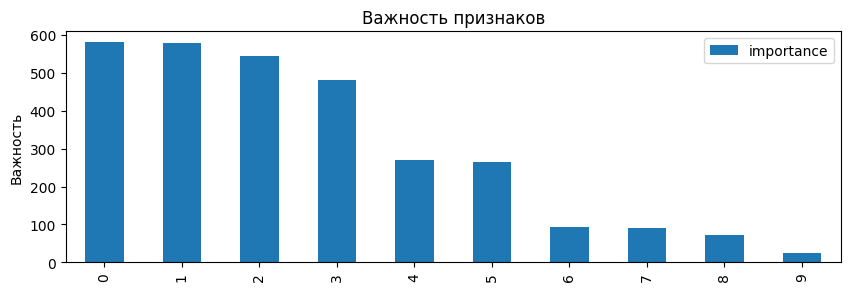

In [66]:
fig, ax = plt.subplots(figsize=(10,3))
feature_results.plot(kind = 'bar', ax =ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
ax.xticks = feature_list
plt.show()

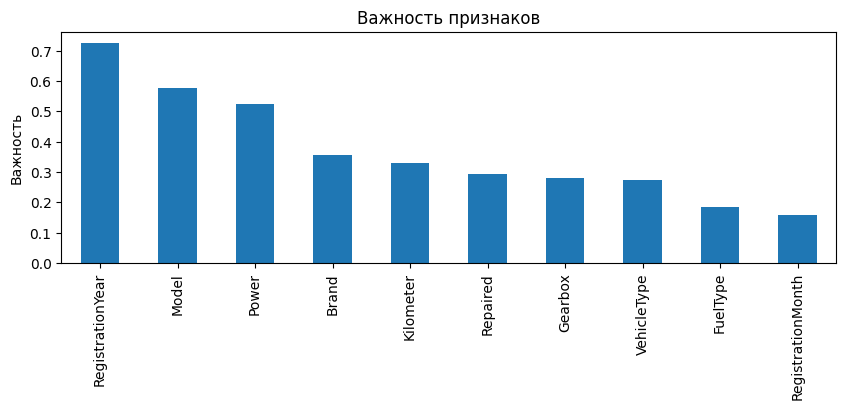

In [67]:
# График на основе phik

fig, ax = plt.subplots(figsize=(10,3))
phik_corr[1:].plot(kind = 'bar', ax =ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
ax.xticks = feature_list
plt.show()